In [38]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_FinalProject/NN-Regression-PurePython/Train_data_x1.csv', encoding = 'ISO-8859-1')

In [5]:
X

,age,how_tall_in_meters,weight,body_mass_index,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,user_debora,user_katia,user_wallace,user_jose_carlos,gender_Woman,gender_Man,class_sitting,class_sittingdown,class_standing,class_standingup,class_walking,x1
0,46,162,75,28.6,91,-87,26,39,-124,15,108,-88,-179,-106,-173,1,0,0,0,1,0,0,0,0,0,1,7
1,75,167,67,24.0,92,-156,-4,90,-93,14,120,-107,-195,-79,-156,0,0,0,1,0,1,0,0,1,0,0,-14
2,31,171,83,28.4,96,-131,-15,91,-129,6,118,-78,-179,-78,-157,0,0,1,0,0,1,0,0,1,0,0,-6
3,28,158,55,22.0,131,-138,-350,-406,-515,32,148,-118,-171,-54,-173,0,1,0,0,1,0,0,0,0,0,1,21
4,31,171,83,28.4,99,-137,-30,-13,-23,65,57,-81,-110,-117,-174,0,0,1,0,0,1,0,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132501,46,162,75,28.6,104,-130,-2,46,-25,-2,103,-67,-199,-76,-152,1,0,0,0,1,0,0,1,0,0,0,1
132502,31,171,83,28.4,91,-130,-3,88,-142,35,125,-75,-173,-71,-151,0,0,1,0,0,1,0,0,1,0,0,-15
132503,31,171,83,28.4,70,-62,-24,-29,-23,61,54,-104,-95,-134,-165,0,0,1,0,0,1,1,0,0,0,0,1
132504,75,167,67,24.0,93,-156,-3,93,-96,16,121,-109,-189,-78,-160,0,0,0,1,0,1,0,0,1,0,0,-13


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132506 entries, 0 to 132505
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 132506 non-null  int64  
 1   how_tall_in_meters  132506 non-null  int64  
 2   weight              132506 non-null  int64  
 3   body_mass_index     132506 non-null  float64
 4   y1                  132506 non-null  int64  
 5   z1                  132506 non-null  int64  
 6   x2                  132506 non-null  int64  
 7   y2                  132506 non-null  int64  
 8   z2                  132506 non-null  int64  
 9   x3                  132506 non-null  int64  
 10  y3                  132506 non-null  int64  
 11  z3                  132506 non-null  int64  
 12  x4                  132506 non-null  int64  
 13  y4                  132506 non-null  int64  
 14  z4                  132506 non-null  int64  
 15  user_debora         132506 non-nul

In [7]:
X.columns

Index(['age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'y1', 'z1',
       'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'user_debora',
       'user_katia', 'user_wallace', 'user_jose_carlos', 'gender_Woman',
       'gender_Man', 'class_sitting', 'class_sittingdown', 'class_standing',
       'class_standingup', 'class_walking', 'x1'],
      dtype='object')

In [8]:
selectF=['age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'y1', 'z1',
       'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'user_debora',
       'user_katia', 'user_wallace', 'user_jose_carlos', 'gender_Woman',
       'gender_Man', 'class_sitting', 'class_sittingdown', 'class_standing',
       'class_standingup', 'class_walking']

In [9]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [10]:
Xtrain = X[selectF]

In [11]:
Xtrain

,age,how_tall_in_meters,weight,body_mass_index,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,user_debora,user_katia,user_wallace,user_jose_carlos,gender_Woman,gender_Man,class_sitting,class_sittingdown,class_standing,class_standingup,class_walking
0,46,162,75,28.6,91,-87,26,39,-124,15,108,-88,-179,-106,-173,1,0,0,0,1,0,0,0,0,0,1
1,75,167,67,24.0,92,-156,-4,90,-93,14,120,-107,-195,-79,-156,0,0,0,1,0,1,0,0,1,0,0
2,31,171,83,28.4,96,-131,-15,91,-129,6,118,-78,-179,-78,-157,0,0,1,0,0,1,0,0,1,0,0
3,28,158,55,22.0,131,-138,-350,-406,-515,32,148,-118,-171,-54,-173,0,1,0,0,1,0,0,0,0,0,1
4,31,171,83,28.4,99,-137,-30,-13,-23,65,57,-81,-110,-117,-174,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132501,46,162,75,28.6,104,-130,-2,46,-25,-2,103,-67,-199,-76,-152,1,0,0,0,1,0,0,1,0,0,0
132502,31,171,83,28.4,91,-130,-3,88,-142,35,125,-75,-173,-71,-151,0,0,1,0,0,1,0,0,1,0,0
132503,31,171,83,28.4,70,-62,-24,-29,-23,61,54,-104,-95,-134,-165,0,0,1,0,0,1,1,0,0,0,0
132504,75,167,67,24.0,93,-156,-3,93,-96,16,121,-109,-189,-78,-160,0,0,0,1,0,1,0,0,1,0,0


In [12]:
ytrain = X['x1']

In [13]:
ytrain

0          7
1        -14
2         -6
3         21
4          9
          ..
132501     1
132502   -15
132503     1
132504   -13
132505   -13
Name: x1, Length: 132506, dtype: int64

In [14]:
Xtrain.shape

(132506, 26)

In [15]:
ytrain.shape

(132506,)

In [16]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Xtrain)

In [17]:
X_scaled

array([[0.38297872, 0.30769231, 0.71428571, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.69230769, 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       [0.06382979, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.06382979, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.69230769, 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [18]:
X_scaled.shape

(132506, 26)

In [19]:
scaler.data_max_

array([ 75. , 171. ,  83. ,  28.6, 533. , 411. , 473. , 295. , 122. ,
       502. , 517. , 410. , -13. ,  -7. , -43. ,   1. ,   1. ,   1. ,
         1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ])

In [20]:
scaler.data_min_

array([  28.,  158.,   55.,   22., -271., -603., -494., -517., -617.,
       -499., -506., -613., -702., -526., -537.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [21]:
ytrain = ytrain.values.reshape(-1,1)

In [22]:
y_scaled = scaler.fit_transform(ytrain)

In [23]:
y_scaled

array([[0.38404908],
       [0.35828221],
       [0.36809816],
       ...,
       [0.37668712],
       [0.3595092 ],
       [0.3595092 ]])

### TRAINING THE MODEL

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [25]:
X_train.shape

(99379, 26)

In [26]:
X_test.shape

(33127, 26)

In [40]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(26, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [43]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
1591/1591 [==============================] - 4s 2ms/step - loss: 1.8725e-04 - val_loss: 1.1984e-04
Epoch 2/100
1591/1591 [==============================] - 3s 2ms/step - loss: 1.2940e-04 - val_loss: 2.7009e-04
Epoch 3/100
1591/1591 [==============================] - 4s 2ms/step - loss: 1.2270e-04 - val_loss: 1.1839e-04
Epoch 4/100
1591/1591 [==============================] - 3s 2ms/step - loss: 1.1350e-04 - val_loss: 1.0106e-04
Epoch 5/100
1591/1591 [==============================] - 4s 2ms/step - loss: 1.0502e-04 - val_loss: 1.0015e-04
Epoch 6/100
1591/1591 [==============================] - 3s 2ms/step - loss: 1.0179e-04 - val_loss: 1.0072e-04
Epoch 7/100
1591/1591 [==============================] - 3s 2ms/step - loss: 9.8044e-05 - val_loss: 1.3780e-04
Epoch 8/100
1591/1591 [==============================] - 3s 2ms/step - loss: 9.6300e-05 - val_loss: 8.3144e-05
Epoch 9/100
1591/1591 [==============================] - 4s 2ms/step - loss: 9.3077e-05 - val_loss: 1.1178e-04
E

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(26, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
# model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 12,901
Trainable params: 12,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [34]:
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 50, validation_split = 0.2)

Epoch 1/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.3223e-05 - val_loss: 6.2713e-05
Epoch 2/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.2802e-05 - val_loss: 6.5321e-05
Epoch 3/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.2824e-05 - val_loss: 6.9008e-05
Epoch 4/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.2787e-05 - val_loss: 6.2711e-05
Epoch 5/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.2634e-05 - val_loss: 6.1651e-05
Epoch 6/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.1298e-05 - val_loss: 6.0209e-05
Epoch 7/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.1945e-05 - val_loss: 6.2346e-05
Epoch 8/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.1186e-05 - val_loss: 5.9065e-05
Epoch 9/10
1591/1591 [==============================] - 3s 2ms/step - loss: 6.1174e-05 - val_loss: 6.3550e-05
Epoch 10/1

## Evaluate

In [39]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

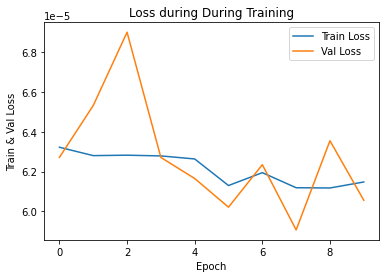

In [40]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Loss during During Training')
plt.xlabel('Epoch')
plt.ylabel('Train & Val Loss')
plt.legend(['Train Loss', 'Val Loss'])

Text(0, 0.5, 'True')

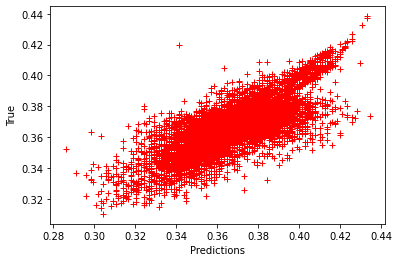

In [41]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "+", color = 'r')
plt.xlabel( 'Predictions')
plt.ylabel('True')


Text(0, 0.5, 'True')

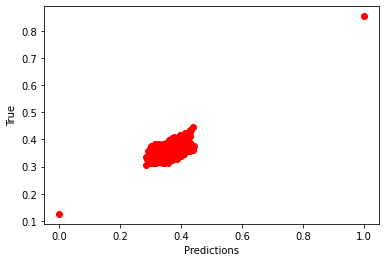

In [46]:
y_predict = model.predict(X_train)
plt.plot(y_train, y_predict, "o", color = 'r')
plt.xlabel( 'Predictions')
plt.ylabel('True')


In [49]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_train)


In [50]:
df = pd.DataFrame(data=y_predict_orig, columns=["p"])
df["a"]=y_test_orig
df.head(20)

,p,a
0,-4.940389,-9.0
1,-5.328137,-26.0
2,3.541365,16.0
3,-8.242439,-9.0
4,-4.708236,-12.0
5,3.267217,24.0
6,2.974123,3.0
7,32.333443,29.0
8,-8.226676,-12.0
9,-21.808296,1.0


In [52]:
k = X_test.shape[1]
n = len(X_train)
n

99379

In [53]:


from sklearn.metrics import mean_squared_error
from math import sqrt
MSE = mean_squared_error(y_test_orig, y_predict_orig)


print('\nMSE =',MSE) 



MSE = 39.963573457328856
